# KPop Data Analysis

K-pop is a popular music genre that originated in South Korea in the 1960s during the development of LP records and recording technology, where it wasn't officially modernized until the 1990s. K-pop still remains a extremely popular genre within the US and continues to grow with the sensualization of new energtic and robust K-pop groups. I will be analyzing data as early as from 1995 to our present day. Three data tables will be used:
- kpop_artists.csv; All k-pop artists 
- kpop_boy_groups.csv; All k-pop boy groups
- kpop_girl_groups.csv; All k-pop girl groups
With these tables, this data analysis will be very general and constrained to the scope of the data. 

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
artists = pd.read_csv('kpop_artists.csv')
boy_groups = pd.read_csv('kpop_boy_groups.csv')
girl_groups = pd.read_csv('kpop_girl_groups.csv')


artists['Birth Year'] = pd.to_datetime(artists['Birthday'], errors='coerce').dt.strftime('%Y')
boy_groups['Debut Year'] = pd.to_datetime(boy_groups['Debut Date'], errors='coerce').dt.strftime('%Y')
girl_groups['Debut Year'] = pd.to_datetime(girl_groups['Debut Date'], errors='coerce').dt.strftime('%Y')

min_boy = boy_groups['Debut Year'].min()
min_girl = girl_groups['Debut Year'].min()

num_active = len(boy_groups.loc[boy_groups['Active'] == 'Yes']) + len(girl_groups.loc[girl_groups['Active'] == 'Yes'])
if min_boy > min_girl:
    earliest_year = min_girl
    earliest_group = girl_groups['Name'].loc[girl_groups['Debut Year'] == min_girl].tolist
else:
    earliest_year = min_boy
    earliest_group = boy_groups.loc[boy_groups['Debut Year'] == min_boy, 'Name'].tolist()

print(f'The earliest K-pop group within the dataset was {earliest_group[0]} who debuted {earliest_year}.')
print(f'There are currently a total of {len(boy_groups) + len(girl_groups)} K-pop groups and {num_active} groups are active.')
boy_groups.head(6)


The earliest K-pop group within the dataset was Turbo who debuted 1995.
There are currently a total of 426 K-pop groups and 264 groups are active.


,Name,Korean Name,Debut Date,Company,Current Member Count,Original Member Count,Active,Debut Year
0,100%,백퍼센트,2012-09-18,TOP Media,4,7,Yes,2012
1,14U,원포유,2017-04-17,BG,14,14,No,2017
2,1TEAM,원팀,2019-03-27,LiveWorks,5,5,No,2019
3,1the9,원더나인,2019-02-09,MBK,9,9,Yes,2019
4,24K,투포케이,2012-09-06,Choeun,5,6,Yes,2012
5,2AM,투에이엠,2008-06-21,"JYP, Big Hit",4,4,No,2008


In [66]:
girl_groups.head(6)

,Name,Korean Name,Debut Date,Company,Current Member Count,Original Member Count,Active,Debut Year
0,(G)I-DLE,(여자)아이들,2018-05-02,Cube,5,6,Yes,2018
1,15&,피프틴앤드,2012-10-05,JYP,2,2,No,2012
2,2EYES,투아이즈,2013-07-20,SidusHQ,4,5,No,2013
3,2NE1,투애니원,2009-05-06,YG,4,4,No,2009
4,3YE,써드아이,2019-05-21,GH,3,3,Yes,2019
5,4Minute,포미닛,2009-06-15,Cube,5,5,No,2009


## Debut Frequency
 We can observe the trends of debuts to understand the impact of real world events and patterns that could accurately make a statement about the industry itself. Within the dataset we can observe a left skewed unimodial distribution. Additionally we can also observe trends in the graph, such as that 2017 to 2019 were K-pop's most active debut time, and the peak has 49 groups debut in 2017.

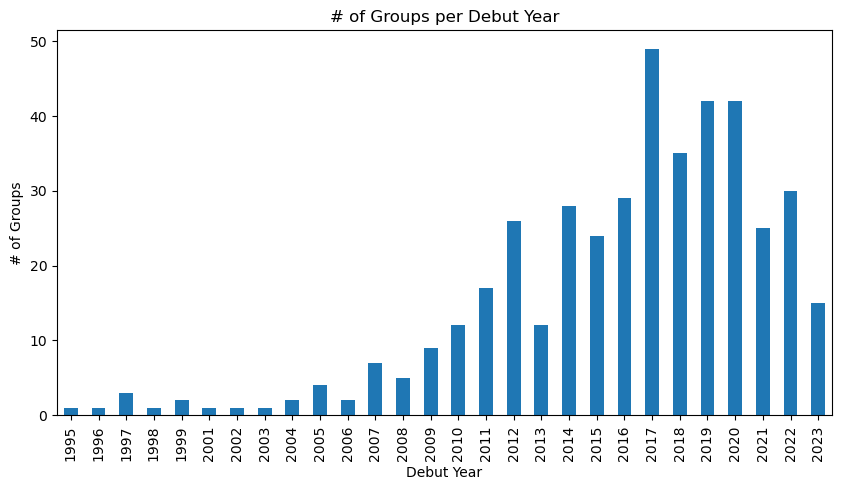

,Debut Year,Counts
0,1995,1
1,1996,1
2,1997,3
3,1998,1
4,1999,2
28,2000,0
5,2001,1
6,2002,1
7,2003,1
8,2004,2


In [185]:
all_groups = pd.concat([boy_groups, girl_groups])
all_groups_values = all_groups['Debut Year'].value_counts().sort_index(ascending=True)
all_groups_plot = all_groups_values.plot(kind='bar', ylabel='# of Groups',title='# of Groups per Debut Year',  figsize= (10, 5))
plt.show()
group_counts = all_groups_values.reset_index(name='Counts')
group_counts.loc[28] = [2000, 0]
group_counts = group_counts.astype({'Debut Year':'int'})
group_counts = group_counts.sort_values(by='Debut Year', ascending=True)
group_counts

## Generation
Different generations of K-pop groups can be catogerized by a date range, and are identified by shifts in sound. 
Gen 0 is identified from 1989 to 1995 with the debut of Hyun Jin-young. It was characterized by American Hip Hop and Swing. Since the earliest year of our K-pop group dataset is 1995, We'll exclude generation 0 in this analysis.
The first generation of K-pop began in 1996 with the debut of *H.O.T*, and ended in 2002 **(1996-2002)**. 

Generation two started in 2003 and ended in 2011 **(2003-2011)**. 

The third gen is one of the most iconic, containing K-pop groups that were sensationalized in the United States and South Korea such as *Blackpink*, *BTS*, and *Twice*. Starting in 2012 and ending in 2017 **(2012-2017)**, it put in a vibrant genre which contained juxtapositions of dark undertones with mostly bright choreograph in order to appeal to the dancers. As a result, K-pop gradually shifted towards a large emphasis on dancing. 
 
Lastly, the fourth generation which started in 2018 and is still present to this day **(2018-2023/present)**, brought to US national attention through the use of social media. 


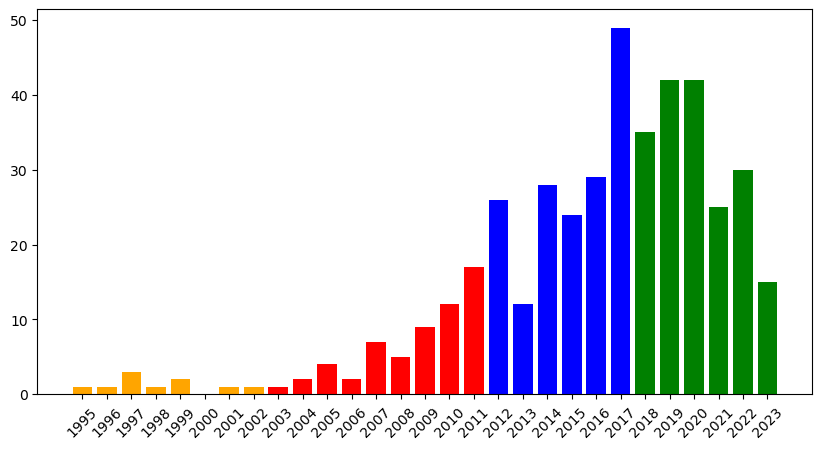

In [186]:
colors = []
list_counts = group_counts['Counts'].tolist()
list_years = list(range(1995, 2024))
for year in group_counts['Debut Year']:
    if int(year) <= 2002:
        colors.append('orange')
    elif int(year) <= 2011:
        colors.append('red')
    elif int(year) <= 2017:
        colors.append('blue')
    elif int(year) <= 2023:
        colors.append('green')
plt.figure(figsize=(10, 5))
plt.bar(list_years, list_counts, 0.8, color= colors,)
plt.xticks(list_years, rotation=45)


plt.show()

## Age
The distribution of the ages of K-pop artists is roughly right skewed unimodal. The average age is approximately 25.6 years old. The oldest observed is 45 years of age and the youngest is 14 years of age.

The average age of the K-pop artists within this data set is approximately 25.6 years old with a standard deviation of 4.9 years


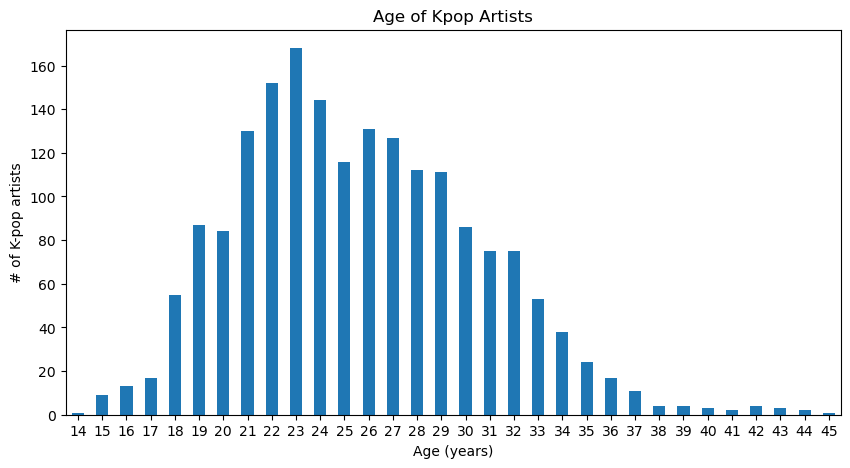

In [187]:
from datetime import date
 
def calculateAge(birthDate):
    today = date.today()
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day))
    return age

artists['Age'] = pd.to_datetime(artists['Birthday'], errors='coerce').apply(calculateAge)
artists_age_counts = artists['Age'].value_counts().sort_index(ascending=True)
plt.xticks(rotation=45)
artists_age_plot = artists_age_counts.plot(kind='bar', xlabel='Age (years)',ylabel='# of K-pop artists',title='Age of Kpop Artists',  figsize= (10, 5), rot=0)
artists_mean = round(artists['Age'].mean(),1)
artists_std = round(artists['Age'].std(), 1)
print(f'The average age of the K-pop artists within this data set is approximately {artists_mean} years old with a standard deviation of {artists_std} years')


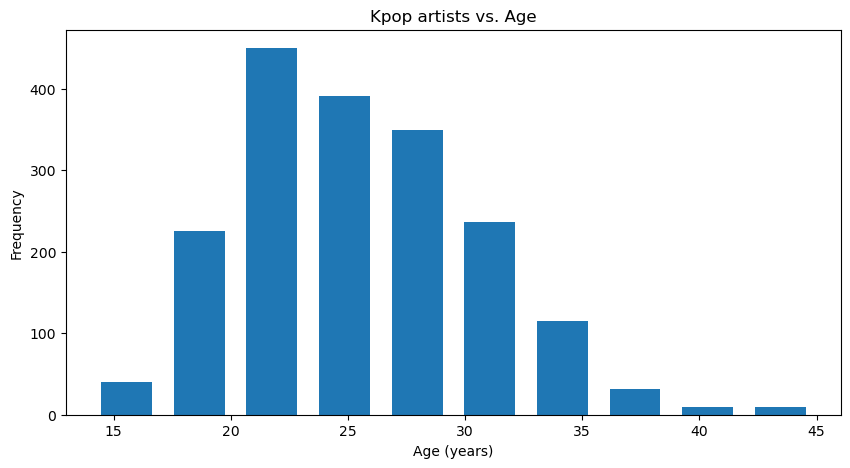

In [188]:
artists['Age'].plot(kind='hist', rwidth = 0.7, title='Kpop artists vs. Age', xlabel='Age (years)', figsize= (10, 5))
plt.show()


## Companies
SM has the most amount of K-pop groups, totaling at 14. The average of just the top 10 K-pop companies are approximately 7.2 groups, while the average of all the K-pop companies is about 1.5 groups.

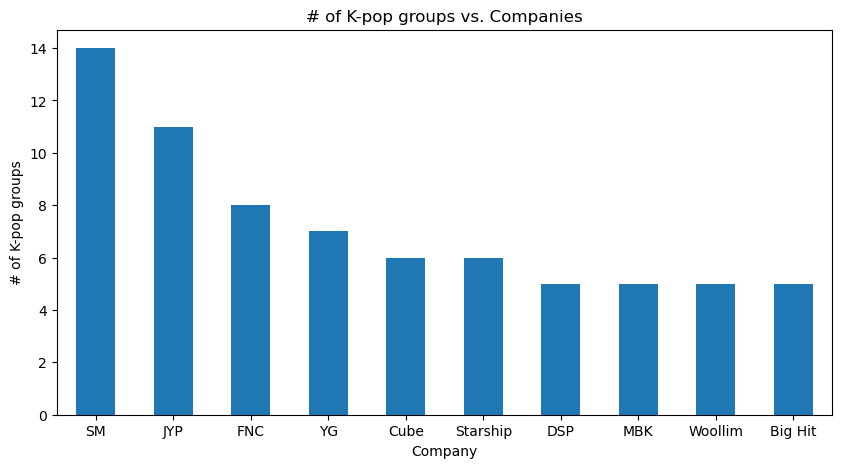

The mean of the top 10 companies are approximately 7.2 groups and the mean of all companies within the data set is about 1.5 groups.
Top 10 companies with most groups: 


,Name,Artist Groups,Count
0,SM,"[EXO, H.O.T, NCT, SHINee, Super Junior, SuperM...",14
1,JYP,"[2PM, DAY6, GOT7, Stray Kids, Xdinary Heroes, ...",11
2,FNC,"[CNBLUE, FTISLAND, Honeyst, N.Flying, P1Harmon...",8
3,YG,"[BIGBANG, iKON, Treasure, WINNER, 2NE1, BABYMO...",7
4,Cube,"[BtoB, PENTAGON, (G)I-DLE, 4Minute, CLC, LIGHT...",6
5,Starship,"[Boyfriend, CRAVITY, MONSTA X, IVE, SISTAR, WJSN]",6
6,DSP,"[A-JAX, MIRAE, April, KARA, Rainbow]",5
7,MBK,"[1the9, Speed, DIA, F-ve Dolls, T-ara]",5
8,Woollim,"[DRIPPIN, Golden Child, Infinite, Lovelyz, Roc...",5
9,Big Hit,"[8Eight, BTS, Homme, TXT, GLAM]",5


In [189]:
all_groups['Company'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5), rot = 0, ylabel='# of K-pop groups', title='# of K-pop groups vs. Companies')
plt.show()
top_company_mean = all_groups['Company'].value_counts().head(10).mean()
company_mean = round(all_groups['Company'].value_counts().mean(),2)
print(f'The mean of the top 10 companies are approximately {top_company_mean} groups and the mean of all companies within the data set is about {company_mean} groups.')
company_counts = all_groups['Company'].value_counts().head(10).tolist()
top_companies = all_groups['Company'].value_counts().head(10).index.to_numpy()
artist_company = []

for el in top_companies:
    artist_company.append(all_groups['Name'].loc[all_groups['Company'] == el].tolist())

companydf = pd.DataFrame({'Name': top_companies, 'Artist Groups': artist_company, 'Count': company_counts})
print('Top 10 companies with most groups: ')
companydf


## Original vs. Current Group Members
A very well known pattern in the K-pop industry are the shifts in the roster of k-pop members within a group. Many factors play in this behavior including different career aspirations, military related service, or the end of some contracts. Approximately 31.92% of groups don't retain original members, which means that 68.08% of groups do. Not a bad statistic, but relatively shocking to see how large the pattern is in general.

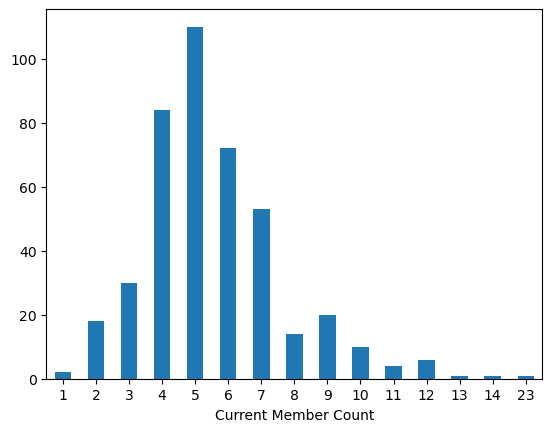

On average, groups have approximately 28.4 members.
About 31.92% of groups have not retained a original number of members in the dataset. Approximately 68.08% have.
The affected groups:


,Name,Korean Name,Debut Date,Company,Current Member Count,Original Member Count,Active,Debut Year
0,100%,백퍼센트,2012-09-18,TOP Media,4,7,Yes,2012
4,24K,투포케이,2012-09-06,Choeun,5,6,Yes,2012
6,2PM,투피엠,2008-07-04,JYP,6,7,Yes,2008
10,A-JAX,에이젝스,2012-06-01,DSP,5,7,No,2012
12,A.cian,에이션,2012-10-10,Wings,4,5,No,2012
...,...,...,...,...,...,...,...,...
204,Wanna.B,워너비,2014-11-17,Zenith,5,4,No,2014
208,Weeekly,위클리,2020-07-30,Play M,6,7,Yes,2020
210,WJSN,우주소녀,2016-02-25,Starship,10,12,Yes,2016
211,Wonder Girls,원더걸스,2007-02-13,JYP,4,5,No,2007


In [182]:
all_groups['Current Member Count'].value_counts().sort_index(ascending=True).plot(kind='bar', rot = 0)
plt.show()
group_members_mean = all_groups['Current Member Count'].value_counts().mean()
print(f'On average, groups have approximately {group_members_mean} members.')
affected_groups = all_groups[all_groups['Current Member Count'] != all_groups['Original Member Count']]
num_affected = len(affected_groups)
percentage_affected = round(100*(num_affected/len(all_groups)),2)
print(f'About {percentage_affected}% of groups have not retained a original number of members in the dataset, and pproximately {100-percentage_affected}% have.')
print('The affected groups:')
affected_groups

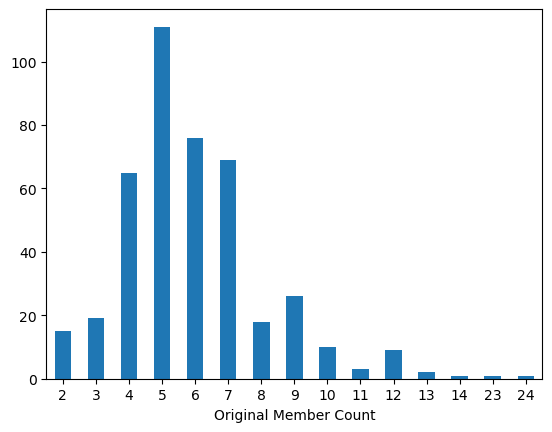

In [168]:
all_groups['Original Member Count'].value_counts().sort_index(ascending=True).plot(kind='bar', rot = 0)
plt.show()